In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-proper-score/master_combined_df_25_random_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_35_random_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_15_normal_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_10_random_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_0_random_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_55_normal_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_55_grid_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_20_random_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_20_normal_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_15_grid_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_25_grid_same_test_date.csv
/kaggle/input/sentiment-proper-score/master_combined_df_50_grid_same_tes

In [2]:
import pandas as pd
import os
from glob import glob
import re



In [3]:
def get_comnined_df(path = "/kaggle/input/risk-management"):
    
    path = path
    csv_files = glob(os.path.join(path, "*.csv"))
    combined_dfs = []
    for file in csv_files:
        filename = os.path.basename(file).replace(".csv", "")
        print(filename)
        lag_match = re.search(r'_(\d+)_', filename)
        Type = filename.strip().split('_')[-4]
        lag = int(lag_match.group(1)) if lag_match else None    
        df = pd.read_csv(file)
        df['lag'] = lag
        df['Type'] = Type
        combined_dfs.append(df)
    df = pd.concat(combined_dfs, ignore_index=True)
    df.rename(columns = {'Unnamed: 0':'Ticker'}, inplace = True)
    return df
def clean_df(data):
    print(data.columns)
    data = data[['Ticker','Model','lag', 'Accuracy_x', 'Confusion Matrix_x','Return [%]_x','Buy & Hold Return [%]_x','Return [%]_y', 'Type','Sharpe Ratio_x','# Trades_x','# Trades_y','Sharpe Ratio_y']]
    data.reset_index(inplace = True,drop = True)


    def get_metrics(data):
        def extract_matrix_values(matrix_str):
            matrix_str = str(matrix_str)
            numbers = re.findall(r'\d+', matrix_str)
            if len(numbers) < 4:
                return pd.Series({'TN': 1, 'FP': 1, 'FN': 1, 'TP': 1})
            
            numbers = [int(x) for x in numbers]
            
            return pd.Series({
                'TN': numbers[0],
                'FP': numbers[1],
                'FN': numbers[2],
                'TP': numbers[3]
            })
        new_columns = data['Confusion Matrix_x'].apply(extract_matrix_values)
        data[['TN', 'FP', 'FN', 'TP']] = new_columns
        
        def calculate_metrics(row):
            tp = row.get('TP', 0)
            fp = row.get('FP', 0)
            fn = row.get('FN', 0)
            tn = row.get('TN', 0)

            precision = tp / (tp + fp) if (tp + fp) != 0 else 0
            tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # True Positive Rate (Recall)
            fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate

            return pd.Series({
                'Precision': precision,
                'TPR': tpr,         
                'FPR': fpr
            })

        
        metrics = data.apply(calculate_metrics, axis=1)
        data = pd.concat([data, metrics], axis=1)
        data.drop(columns = ['Confusion Matrix_x'],inplace = True)
        return data

    data = get_metrics(data)
    return data


In [4]:
df =get_comnined_df('/kaggle/input/blackboxfixed')
df = clean_df(df)

master_combined_df_25_random_same_test_date
master_combined_df_35_random_same_test_date
master_combined_df_15_normal_same_test_date
master_combined_df_10_random_same_test_date
master_combined_df_0_random_same_test_date
master_combined_df_55_normal_same_test_date
master_combined_df_55_grid_same_test_date
master_combined_df_20_random_same_test_date
master_combined_df_20_normal_same_test_date
master_combined_df_15_grid_same_test_date
master_combined_df_25_grid_same_test_date
master_combined_df_50_grid_same_test_date
master_combined_df_0_grid_same_test_date
master_combined_df_10_normal_same_test_date
master_combined_df_55_random_same_test_date
master_combined_df_30_grid_same_test_date
master_combined_df_45_normal_same_test_date
master_combined_df_5_random_same_test_date
master_combined_df_5_normal_same_test_date
master_combined_df_0_normal_same_test_date
master_combined_df_30_normal_same_test_date
master_combined_df_50_random_same_test_date
master_combined_df_40_random_same_test_date
maste

/tmp/ipykernel_31/978072745.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['TN', 'FP', 'FN', 'TP']] = new_columns
/tmp/ipykernel_31/978072745.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['TN', 'FP', 'FN', 'TP']] = new_columns
/tmp/ipykernel_31/978072745.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Checking the Null Values

In [5]:
df.isnull().sum()

Ticker                       0
Model                        0
lag                          0
Accuracy_x                 390
Return [%]_x                 0
Buy & Hold Return [%]_x      0
Return [%]_y                 0
Type                         0
Sharpe Ratio_x              13
# Trades_x                   0
# Trades_y                   0
Sharpe Ratio_y              14
TN                           0
FP                           0
FN                           0
TP                           0
Precision                    0
TPR                          0
FPR                          0
dtype: int64

Removing the actual returns which was from y_test 

In [6]:
data = df[df['Model'] != 'Actual']

In [7]:
data.isnull().sum()

Ticker                      0
Model                       0
lag                         0
Accuracy_x                  0
Return [%]_x                0
Buy & Hold Return [%]_x     0
Return [%]_y                0
Type                        0
Sharpe Ratio_x             13
# Trades_x                  0
# Trades_y                  0
Sharpe Ratio_y             14
TN                          0
FP                          0
FN                          0
TP                          0
Precision                   0
TPR                         0
FPR                         0
dtype: int64

Dealing with Sharpe Ratio Value which is null

Naive Bayes on lag 40 -50 was not able to predict the market predicting all the trend to be negative for AMZN

In [8]:
data[data['Sharpe Ratio_x'].isnull()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Ticker        Model  lag  Accuracy_x  Return [%]_x  \
680    AMZN  Naive Bayes   55    0.388116           0.0   
810    AMZN  Naive Bayes   55    0.388116           0.0   
1460   AMZN  Naive Bayes   50    0.388116           0.0   
1850   AMZN  Naive Bayes   55    0.388116           0.0   
2110   AMZN  Naive Bayes   45    0.388116           0.0   
2760   AMZN  Naive Bayes   50    0.388116           0.0   
2890   AMZN  Naive Bayes   40    0.389381           0.0   
3410   AMZN  Naive Bayes   45    0.388116           0.0   
3540   AMZN  Naive Bayes   60    0.388116           0.0   
3800   AMZN  Naive Bayes   50    0.388116           0.0   
4060   AMZN  Naive Bayes   60    0.388116           0.0   
4710   AMZN  Naive Bayes   45    0.388116           0.0   
4970   AMZN  Naive Bayes   60    0.388116           0.0   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
680                 22.496772        0.0000  normal             NaN   
810                 22.496772        0.0000    grid             NaN   
1460                22.496772        0.0000    grid             NaN   
1850                22.496772        0.0000  random             NaN   
2110                22.496772        0.0000  normal             NaN   
2760                22.496772        0.0000  random             NaN   
2890                22.496772        5.8504  random             NaN   
3410                22.496772        0.0000    grid             NaN   
3540                22.496772        0.0000  random             NaN   
3800                22.496772        0.0000  normal             NaN   
4060                22.496772        0.0000    grid             NaN   
4710                22.496772        0.0000  random             NaN   
4970                22.496772        0.0000  normal             NaN   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN  FP   FN  TP  Precision  \
680            0           0             NaN  307   0  484   0        0.0   
810            0           0             NaN  307   0  484   0        0.0   
1460           0           0             NaN  307   0  484   0        0.0   
1850           0           0             NaN  307   0  484   0        0.0   
2110           0           0             NaN  307   0  484   0        0.0   
2760           0           0             NaN  307   0  484   0        0.0   
2890           1           1        0.652532  307   0  483   1        1.0   
3410           0           0             NaN  307   0  484   0        0.0   
3540           0           0             NaN  307   0  484   0        0.0   
3800           0           0             NaN  307   0  484   0        0.0   
4060           0           0             NaN  307   0  484   0        0.0   
4710           0           0             NaN  307   0  484   0        0.0   
4970           0           0             NaN  307   0  484   0        0.0   

           TPR  FPR  
680   0.000000  0.0  
810   0.000000  0.0  
1460  0.000000  0.0  
1850  0.000000  0.0  
2110  0.000000  0.0  
2760  0.000000  0.0  
2890  0.002066  0.0  
3410  0.000000  0.0  
3540  0.000000  0.0  
3800  0.000000  0.0  
4060  0.000000  0.0  
4710  0.000000  0.0  
4970  0.000000  0.0

In [9]:
data[data['Sharpe Ratio_y'].isnull()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Ticker        Model  lag  Accuracy_x  Return [%]_x  \
680    AMZN  Naive Bayes   55    0.388116        0.0000   
810    AMZN  Naive Bayes   55    0.388116        0.0000   
1460   AMZN  Naive Bayes   50    0.388116        0.0000   
1850   AMZN  Naive Bayes   55    0.388116        0.0000   
2110   AMZN  Naive Bayes   45    0.388116        0.0000   
2760   AMZN  Naive Bayes   50    0.388116        0.0000   
3020   AMZN  Naive Bayes   40    0.389381        6.1344   
3410   AMZN  Naive Bayes   45    0.388116        0.0000   
3540   AMZN  Naive Bayes   60    0.388116        0.0000   
3800   AMZN  Naive Bayes   50    0.388116        0.0000   
4060   AMZN  Naive Bayes   60    0.388116        0.0000   
4710   AMZN  Naive Bayes   45    0.388116        0.0000   
4840   AMZN  Naive Bayes   40    0.389381        6.1344   
4970   AMZN  Naive Bayes   60    0.388116        0.0000   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
680                 22.496772           0.0  normal             NaN   
810                 22.496772           0.0    grid             NaN   
1460                22.496772           0.0    grid             NaN   
1850                22.496772           0.0  random             NaN   
2110                22.496772           0.0  normal             NaN   
2760                22.496772           0.0  random             NaN   
3020                22.496772           0.0  normal        0.651428   
3410                22.496772           0.0    grid             NaN   
3540                22.496772           0.0  random             NaN   
3800                22.496772           0.0  normal             NaN   
4060                22.496772           0.0    grid             NaN   
4710                22.496772           0.0  random             NaN   
4840                22.496772           0.0    grid        0.651428   
4970                22.496772           0.0  normal             NaN   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN  FP   FN  TP  Precision  \
680            0           0             NaN  307   0  484   0        0.0   
810            0           0             NaN  307   0  484   0        0.0   
1460           0           0             NaN  307   0  484   0        0.0   
1850           0           0             NaN  307   0  484   0        0.0   
2110           0           0             NaN  307   0  484   0        0.0   
2760           0           0             NaN  307   0  484   0        0.0   
3020           1           1             NaN  307   0  483   1        1.0   
3410           0           0             NaN  307   0  484   0        0.0   
3540           0           0             NaN  307   0  484   0        0.0   
3800           0           0             NaN  307   0  484   0        0.0   
4060           0           0             NaN  307   0  484   0        0.0   
4710           0           0             NaN  307   0  484   0        0.0   
4840           1           1             NaN  307   0  483   1        1.0   
4970           0           0             NaN  307   0  484   0        0.0   

           TPR  FPR  
680   0.000000  0.0  
810   0.000000  0.0  
1460  0.000000  0.0  
1850  0.000000  0.0  
2110  0.000000  0.0  
2760  0.000000  0.0  
3020  0.002066  0.0  
3410  0.000000  0.0  
3540  0.000000  0.0  
3800  0.000000  0.0  
4060  0.000000  0.0  
4710  0.000000  0.0  
4840  0.002066  0.0  
4970  0.000000  0.0

# Accuracy and Return hypnosis

In [10]:
data.loc[data.groupby('Ticker')['Accuracy_x'].idxmax()]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
782    AAPL              XGBoost   55    0.902655     17.213918   
802     AMD       SGD Classifier   55    0.898862     45.674401   
1206   AMZN                  MLP   15    0.910240     46.233523   
1079  GOOGL  Logistic Regression   20    0.927939      9.437323   
5001   META       SGD Classifier   60    0.862200    223.878898   
334    MSFT       SGD Classifier   15    0.919090     16.617284   
3465   NFLX        Decision Tree   45    0.860936     94.106964   
352    NVDA        Random Forest   15    0.903919    171.705145   
2323    SPY       SGD Classifier    5    0.902655     18.207058   
1684   TSLA        Decision Tree    0    0.886220     95.231416   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
782                 30.377457     22.722223    grid        0.275652   
802                -33.765975     42.440365    grid        0.344451   
1206                22.496772     12.396571    grid        0.486348   
1079                16.213708     22.094803  normal        0.124186   
5001                94.434919    243.348462  normal        1.002414   
334                 17.260642     13.463992  normal        0.274564   
3465                61.218343     62.759669    grid        0.741509   
352                298.891140    422.811120  normal        0.650540   
2323                22.469699     17.465993  random        0.479156   
1684               -29.499572     24.336261    grid        0.465049   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN  FP  FN   TP  Precision  \
782           31          37        0.385171  326  45  32  388   0.896074   
802           16          43        0.355052  417  30  50  294   0.907407   
1206          17          34        0.170778  281  26  45  439   0.944086   
1079          22          29        0.281978  340  15  42  394   0.963325   
5001          17          24        1.062548  232  47  62  450   0.905433   
334           17          22        0.230367  353  22  42  374   0.944444   
3465          29          45        0.595816  252  17  93  429   0.961883   
352           25          52        1.160512  302  40  36  413   0.911700   
2323          25          24        0.455796  246  36  41  468   0.928571   
1684          25          57        0.186310  392  62  28  309   0.832884   

           TPR       FPR  
782   0.923810  0.121294  
802   0.854651  0.067114  
1206  0.907025  0.084691  
1079  0.903670  0.042254  
5001  0.878906  0.168459  
334   0.899038  0.058667  
3465  0.821839  0.063197  
352   0.919822  0.116959  
2323  0.919450  0.127660  
1684  0.916914  0.136564

In [11]:
data.loc[data.groupby('Ticker')['Accuracy_x'].idxmax()].sum()

Ticker                               AAPLAMDAMZNGOOGLMETAMSFTNFLXNVDASPYTSLA
Model                      XGBoostSGD ClassifierMLPLogistic RegressionSGD...
lag                                                                      285
Accuracy_x                                                          8.974716
Return [%]_x                                                      738.305928
Buy & Hold Return [%]_x                                           500.097133
Return [%]_y                                                      883.839459
Type                       gridgridgridnormalnormalnormalgridnormalrandom...
Sharpe Ratio_x                                                      4.843868
# Trades_x                                                               224
# Trades_y                                                               367
Sharpe Ratio_y                                                      4.884328
TN                                                                      3141

In [12]:
final_data = data.loc[data.groupby('Ticker')['Accuracy_x'].idxmax()]

In [13]:
final_data.groupby('lag')['Model'].value_counts()

lag  Model              
0    Decision Tree          1
5    SGD Classifier         1
15   MLP                    1
     Random Forest          1
     SGD Classifier         1
20   Logistic Regression    1
45   Decision Tree          1
55   SGD Classifier         1
     XGBoost                1
60   SGD Classifier         1
Name: count, dtype: int64

In [14]:
final_data.groupby('lag')['Ticker'].value_counts()

lag  Ticker
0    TSLA      1
5    SPY       1
15   AMZN      1
     MSFT      1
     NVDA      1
20   GOOGL     1
45   NFLX      1
55   AAPL      1
     AMD       1
60   META      1
Name: count, dtype: int64

In [15]:
final_data.groupby('Model')['lag'].value_counts()

Model                lag
Decision Tree        0      1
                     45     1
Logistic Regression  20     1
MLP                  15     1
Random Forest        15     1
SGD Classifier       5      1
                     15     1
                     55     1
                     60     1
XGBoost              55     1
Name: count, dtype: int64

In [16]:
final_data.Model.value_counts()

Model
SGD Classifier         4
Decision Tree          2
XGBoost                1
MLP                    1
Logistic Regression    1
Random Forest          1
Name: count, dtype: int64

In [17]:
data.loc[data.groupby('Ticker')['Accuracy_x'].idxmax()].sum()

Ticker                               AAPLAMDAMZNGOOGLMETAMSFTNFLXNVDASPYTSLA
Model                      XGBoostSGD ClassifierMLPLogistic RegressionSGD...
lag                                                                      285
Accuracy_x                                                          8.974716
Return [%]_x                                                      738.305928
Buy & Hold Return [%]_x                                           500.097133
Return [%]_y                                                      883.839459
Type                       gridgridgridnormalnormalnormalgridnormalrandom...
Sharpe Ratio_x                                                      4.843868
# Trades_x                                                               224
# Trades_y                                                               367
Sharpe Ratio_y                                                      4.884328
TN                                                                      3141

Our most accurate models were able to cross the buy and hold baseline. But still, this is not the best return this is the most accurate models on each Ticker. Our analysis has found SGD classifier being the most accurate result followed by Trees Models like RF and DT. We can also see the lag 15 being higher count in value where models like RF,MLP,SGD were able to be accurate. If we look at the risk structure strategy 2 sum of the returns in our portfolio. We can see it was even able to outperform the market as well it was able to cross the naked returns only too with 858(with risk management) vs 724 (returns without risk managemtn) vs 500% (buy and hold). 

In [18]:
data.groupby('Ticker')['Model'].value_counts()

Ticker  Model              
AAPL    AdaBoost               39
        Decision Tree          39
        Gradient Boosting      39
        K-Nearest Neighbors    39
        LGBMClassifier         39
                               ..
TSLA    Naive Bayes            39
        Random Forest          39
        SGD Classifier         39
        SVM                    39
        XGBoost                39
Name: count, Length: 120, dtype: int64

In [19]:
data.Ticker.value_counts().reset_index()

Ticker  count
0   AAPL    468
1    AMD    468
2   AMZN    468
3  GOOGL    468
4   META    468
5   MSFT    468
6   NFLX    468
7   NVDA    468
8    SPY    468
9   TSLA    468

Around 396 models were trained and tested among 10 STOCKS

In [20]:
data.Model.value_counts().reset_index()

Model  count
0   Logistic Regression    390
1         Random Forest    390
2               XGBoost    390
3                   SVM    390
4           Naive Bayes    390
5     Gradient Boosting    390
6   K-Nearest Neighbors    390
7         Decision Tree    390
8              AdaBoost    390
9        SGD Classifier    390
10                  MLP    390
11       LGBMClassifier    390

We tested 12 ML models under 10 stocks with almost 330 different configuration for each model

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
data[data['lag'] == 0].groupby('Ticker')[['Return [%]_x','Buy & Hold Return [%]_x','Return [%]_y']].mean()

Return [%]_x  Buy & Hold Return [%]_x  Return [%]_y
Ticker                                                     
AAPL        8.505464                30.377457     10.897119
AMD        25.420898               -33.765975     31.750308
AMZN       38.225199                22.496772     31.829771
GOOGL      -4.322820                16.213708     -1.995322
META      209.122043                94.434919    211.016701
MSFT        8.455028                17.260642     10.282151
NFLX       80.762287                61.218343     62.962528
NVDA      272.349387               298.891140    324.747690
SPY        23.970570                22.469699     24.798186
TSLA       54.146910               -29.499572     59.377656

In [23]:
final_data = data.groupby(['Model','Ticker','lag','Type'])[['Return [%]_x','Buy & Hold Return [%]_x','Return [%]_y']].mean().groupby(['lag','Type','Model'])[['Return [%]_x','Buy & Hold Return [%]_x','Return [%]_y']].sum()

In [24]:
final_data[final_data['Return [%]_x'] > final_data['Buy & Hold Return [%]_x']].shape

(443, 3)

from our observation, we found the buy and hold return if we invested in this stock then it would have been 500% return over 3 years. It is a good return isn't it. But if we implemented the machine learning algorithm regardless the lag, regardless any algorithm our portfolio would have substantially outperformed the market. As displayed above we tested 396 different models under different configurations like lag and hyperparameter tuning in each ticker. Outo of 396 models , 379 of them significantly outperform the buy and hold strategy. 

In [25]:
final_data.shape

(468, 3)

In [26]:
final_data.sort_values(by = 'Return [%]_x',ascending = True).head()

Return [%]_x  Buy & Hold Return [%]_x  \
lag Type   Model                                                        
60  random SGD Classifier         278.407271               500.097133   
40  grid   MLP                    405.884544               500.097133   
45  grid   SGD Classifier         413.889138               500.097133   
20  normal K-Nearest Neighbors    415.449510               500.097133   
60  grid   SGD Classifier         419.057442               500.097133   

                                Return [%]_y  
lag Type   Model                              
60  random SGD Classifier         339.056374  
40  grid   MLP                    694.576533  
45  grid   SGD Classifier         553.900874  
20  normal K-Nearest Neighbors    557.402758  
60  grid   SGD Classifier         405.763356

In [27]:
final_data.sort_values(by = 'Return [%]_y',ascending = True).head()

Return [%]_x  Buy & Hold Return [%]_x  Return [%]_y
lag Type   Model                                                              
60  random SGD Classifier    278.407271               500.097133    339.056374
30  random Naive Bayes       539.672908               500.097133    359.921281
35  random Naive Bayes       627.090690               500.097133    367.442140
45  random SGD Classifier    578.138721               500.097133    383.306921
40  random Naive Bayes       695.801957               500.097133    394.897444

In [28]:
final_data[(final_data['Return [%]_x'] > final_data['Buy & Hold Return [%]_x'])  ]

Return [%]_x  Buy & Hold Return [%]_x  \
lag Type   Model                                                        
0   grid   AdaBoost               638.474977               500.097133   
           Decision Tree          507.300846               500.097133   
           Gradient Boosting      533.242500               500.097133   
           K-Nearest Neighbors    602.647603               500.097133   
           LGBMClassifier         833.499740               500.097133   
           Logistic Regression    823.555039               500.097133   
           MLP                    575.717654               500.097133   
           Naive Bayes            595.299965               500.097133   
           Random Forest          850.447001               500.097133   
           SGD Classifier         691.539154               500.097133   
           SVM                    693.439435               500.097133   
           XGBoost                701.272245               500.097133   
    normal AdaBoost               586.460786               500.097133   
           Decision Tree          592.016947               500.097133   
           Gradient Boosting      603.082619               500.097133   
           K-Nearest Neighbors    606.630786               500.097133   
           LGBMClassifier         833.499740               500.097133   
           Logistic Regression    774.501330               500.097133   
           MLP                    581.292951               500.097133   
           Naive Bayes            603.669358               500.097133   
           Random Forest          763.300323               500.097133   
           SGD Classifier         641.801357               500.097133   
           SVM                    715.660134               500.097133   
           XGBoost                519.717640               500.097133   
    random AdaBoost               978.093985               500.097133   
           Gradient Boosting      662.937564               500.097133   
           K-Nearest Neighbors    896.040529               500.097133   
           LGBMClassifier         946.444104               500.097133   
           Logistic Regression   1028.169412               500.097133   
           MLP                    785.430344               500.097133   
           Naive Bayes            802.501777               500.097133   
           Random Forest          877.015859               500.097133   
           SGD Classifier         890.949168               500.097133   
           SVM                    900.051453               500.097133   
           XGBoost                733.520114               500.097133   
5   grid   AdaBoost               655.996521               500.097133   
           Decision Tree          519.250569               500.097133   
           Gradient Boosting      577.500895               500.097133   
           K-Nearest Neighbors    598.910862               500.097133   
           LGBMClassifier         853.793404               500.097133   
           Logistic Regression    836.526655               500.097133   
           MLP                    598.401290               500.097133   
           Naive Bayes            556.631968               500.097133   
           Random Forest          786.025172               500.097133   
           SGD Classifier         687.619741               500.097133   
           SVM                    777.432614               500.097133   
           XGBoost                674.997234               500.097133   
    normal AdaBoost               602.195923               500.097133   
           Decision Tree          602.651699               500.097133   
           Gradient Boosting      666.768117               500.097133   
           K-Nearest Neighbors    650.686991               500.097133   
           LGBMClassifier         853.793404               500.097133   
           Logistic Regression    597.475252               500.097133   
           Naive 

In [29]:
final_data[final_data['Return [%]_y'] > final_data['Buy & Hold Return [%]_x']].head()

Return [%]_x  Buy & Hold Return [%]_x  \
lag Type Model                                                        
0   grid AdaBoost               638.474977               500.097133   
         Decision Tree          507.300846               500.097133   
         Gradient Boosting      533.242500               500.097133   
         K-Nearest Neighbors    602.647603               500.097133   
         LGBMClassifier         833.499740               500.097133   

                              Return [%]_y  
lag Type Model                              
0   grid AdaBoost               978.093985  
         Decision Tree          592.932955  
         Gradient Boosting      673.677530  
         K-Nearest Neighbors    899.835226  
         LGBMClassifier         946.444104

In [30]:
data.groupby(['Ticker','Model'])[['Return [%]_x','Buy & Hold Return [%]_x','Return [%]_y']].mean().groupby('Model').sum()

Return [%]_x  Buy & Hold Return [%]_x  Return [%]_y
Model                                                                   
AdaBoost               730.059259               500.097133    782.707042
Decision Tree          568.947424               500.097133    578.197283
Gradient Boosting      715.072436               500.097133    756.914328
K-Nearest Neighbors    563.861992               500.097133    559.640703
LGBMClassifier         736.819711               500.097133    745.659779
Logistic Regression    876.692933               500.097133    874.392748
MLP                    625.686450               500.097133    654.046031
Naive Bayes            599.042921               500.097133    603.385070
Random Forest          780.236027               500.097133    802.465472
SGD Classifier         685.787286               500.097133    709.044561
SVM                    713.636136               500.097133    702.147031
XGBoost                659.585718               500.097133    722.138430

This is an average return of the models with different lag used in different Ticker. If we look closely, sum of returns of individual returns with machine learning model is able to outperform Buy and Hold sum. 

In [31]:
data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
524    AAPL          Naive Bayes    0    0.883692     52.086655   
15      AMD              XGBoost   25    0.844501     95.717461   
288    AMZN              XGBoost   15    0.895070     91.860315   
46    GOOGL        Decision Tree   25    0.787611     34.953998   
2395   META                  SVM    5    0.821745    354.692579   
1106   MSFT        Random Forest   20    0.677623     42.026809   
4375   NFLX        Decision Tree   10    0.810367    161.144968   
91     NVDA  Logistic Regression   25    0.878635    574.138232   
2186    SPY              XGBoost   45    0.891277     39.388498   
906    TSLA       SGD Classifier   55    0.797724    170.442421   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
524                 30.377457     38.375888  random        0.772970   
15                 -33.765975     87.694782  random        0.703695   
288                 22.496772     85.176460  normal        0.794970   
46                  16.213708     34.560160  random        0.387196   
2395                94.434919    354.055160  normal        1.220025   
1106                17.260642     38.215785  normal        0.808605   
4375                61.218343    114.764240    grid        0.862458   
91                 298.891140    270.006242  random        1.163954   
2186                22.469699     36.206726  normal        0.966549   
906                -29.499572    111.252441    grid        0.915256   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN   FP   FN   TP  Precision  \
524           33          26        0.581169  314   57   35  385   0.871041   
15            25          18        0.643226  427   20  103  241   0.923372   
288           26          35        0.778165  280   27   56  428   0.940659   
46            66          39        0.354686  234  121   47  389   0.762745   
2395          18          27        1.249256  202   77   64  448   0.853333   
1106          16          18        0.749024  364   11  244  172   0.939891   
4375          25          42        0.760932  201   68   82  440   0.866142   
91            42          22        0.811699  282   60   36  413   0.873150   
2186          25          27        0.924635  260   22   64  445   0.952891   
906           17          30        0.821154  448    6  154  183   0.968254   

           TPR       FPR  
524   0.916667  0.153639  
15    0.700581  0.044743  
288   0.884298  0.087948  
46    0.892202  0.340845  
2395  0.875000  0.275986  
1106  0.413462  0.029333  
4375  0.842912  0.252788  
91    0.919822  0.175439  
2186  0.874263  0.078014  
906   0.543027  0.013216

Above represents the best model in terms of returns in each ticker, these models are able to maximize their returns into highest possible. 

In [32]:
data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()][['Return [%]_x','Buy & Hold Return [%]_x','Accuracy_x']].sum()

Return [%]_x               1616.451936
Buy & Hold Return [%]_x     500.097133
Accuracy_x                    8.288243
dtype: float64

In this table, we can see the best models sum in our portfolio. If we look at our portfolio, our best machine learning models are able to get 3 times more return compared to buy and hold strategy. If we talk about the accuracy average is 83.5% which is not that bad either. Lets see how would this be compared to risk management structure.

In [33]:
df[df['Accuracy_x'].isnull()].Model.value_counts()

Model
Actual    390
Name: count, dtype: int64

In [34]:
df['Accuracy_x'].fillna(1,inplace = True)

/tmp/ipykernel_31/3310847683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Accuracy_x'].fillna(1,inplace = True)


In [35]:
df[df['Accuracy_x'].isnull()].Model.value_counts()

Series([], Name: count, dtype: int64)

In [36]:
df.isnull().sum()

Ticker                      0
Model                       0
lag                         0
Accuracy_x                  0
Return [%]_x                0
Buy & Hold Return [%]_x     0
Return [%]_y                0
Type                        0
Sharpe Ratio_x             13
# Trades_x                  0
# Trades_y                  0
Sharpe Ratio_y             14
TN                          0
FP                          0
FN                          0
TP                          0
Precision                   0
TPR                         0
FPR                         0
dtype: int64

In [37]:
data = df[df['Model'] != 'Actual']

In [38]:
data[data['Return [%]_x'] > data['Buy & Hold Return [%]_x']]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
13      AMD  Logistic Regression   25    0.854614     82.923056   
14      AMD        Random Forest   25    0.780025     55.002753   
15      AMD              XGBoost   25    0.844501     95.717461   
16      AMD                  SVM   25    0.840708     27.939207   
17      AMD          Naive Bayes   25    0.840708     11.190420   
18      AMD    Gradient Boosting   25    0.807838     80.688335   
19      AMD  K-Nearest Neighbors   25    0.769912    -22.646195   
20      AMD        Decision Tree   25    0.836915      3.573423   
21      AMD             AdaBoost   25    0.858407     43.971625   
22      AMD       SGD Classifier   25    0.850822     47.561985   
23      AMD                  MLP   25    0.845765     77.744581   
24      AMD       LGBMClassifier   25    0.829330     52.336599   
26     AMZN  Logistic Regression   25    0.882427     27.221262   
27     AMZN        Random Forest   25    0.878635     58.612076   
28     AMZN              XGBoost   25    0.890013     44.578175   
31     AMZN    Gradient Boosting   25    0.886220     56.910896   
33     AMZN        Decision Tree   25    0.858407     22.545937   
34     AMZN             AdaBoost   25    0.874842     33.800154   
37     AMZN       LGBMClassifier   25    0.882427     31.121459   
39    GOOGL  Logistic Regression   25    0.901391     20.402515   
46    GOOGL        Decision Tree   25    0.787611     34.953998   
48    GOOGL       SGD Classifier   25    0.911504     30.827045   
49    GOOGL                  MLP   25    0.888748     24.531194   
52     META  Logistic Regression   25    0.848293    230.794748   
53     META        Random Forest   25    0.858407    249.170479   
54     META              XGBoost   25    0.826802    266.500155   
55     META                  SVM   25    0.836915    230.092730   
56     META          Naive Bayes   25    0.815424    205.199446   
57     META    Gradient Boosting   25    0.830594    174.461263   
58     META  K-Nearest Neighbors   25    0.814159    214.075733   
59     META        Decision Tree   25    0.817952    203.199935   
60     META             AdaBoost   25    0.858407    226.142145   
61     META       SGD Classifier   25    0.752212    197.315686   
62     META                  MLP   25    0.855879    228.039706   
63     META       LGBMClassifier   25    0.847029    195.833081   
66     MSFT        Random Forest   25    0.668774     30.541475   
70     MSFT    Gradient Boosting   25    0.666245     26.347869   
71     MSFT  K-Nearest Neighbors   25    0.720607     20.226922   
78     NFLX  Logistic Regression   25    0.854614     83.973965   
79     NFLX        Random Forest   25    0.847029     64.869157   
91     NVDA  Logistic Regression   25    0.878635    574.138232   
92     NVDA        Random Forest   25    0.883692    485.731669   
93     NVDA              XGBoost   25    0.860936    315.534959   
94     NVDA                  SVM   25    0.873578    483.739799   
95     NVDA          Naive Bayes   25    0.855879    346.403403   
96     NVDA    Gradient Boosting   25    0.867257    346.991355   
99     NVDA             AdaBoost   25    0.900126    465.798792   
101    NVDA                  MLP   25    0.871049    386.167627   
102    NVDA       LGBMClassifier   25    0.896334    358.132402   
105     SPY        Random Forest   25    0.830594     36.040783   
110     SPY  K-Nearest Neighbors   25    0.791403     30.168358   
112     SPY             AdaBoost   25    0.867257     23.146376   
114     SPY                  MLP   25    0.835651     28.937856   
117    TSLA  Logistic Regression   25    0.850822     62.731682   
118    TSLA        Random Forest   25    0.858407     67.938883   
119    TSLA              XGBoost   25    0.872314     50.972858   
120    TSLA                  SVM   25    0.865992     21.835289   
121    TSLA          Naive Bayes   25    0.652339     61.346568   
122    TSLA    Gradient Boosting   25    0.878635   

In [39]:
data[data['Return [%]_x'] > data['Buy & Hold Return [%]_x']].Ticker.value_counts()

Ticker
AMD      468
TSLA     467
META     466
AMZN     327
NFLX     321
SPY      174
NVDA     136
MSFT     118
GOOGL     51
AAPL      23
Name: count, dtype: int64

In [40]:
data[data['Return [%]_y'] > data['Buy & Hold Return [%]_x']].Ticker.value_counts()

Ticker
AMD      465
META     463
TSLA     461
AMZN     297
SPY      207
NFLX     199
NVDA     196
MSFT     144
GOOGL     40
AAPL      34
Name: count, dtype: int64

In [41]:
data[data['Return [%]_y'] > data['Buy & Hold Return [%]_x']]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
13      AMD  Logistic Regression   25    0.854614     82.923056   
14      AMD        Random Forest   25    0.780025     55.002753   
15      AMD              XGBoost   25    0.844501     95.717461   
16      AMD                  SVM   25    0.840708     27.939207   
17      AMD          Naive Bayes   25    0.840708     11.190420   
18      AMD    Gradient Boosting   25    0.807838     80.688335   
19      AMD  K-Nearest Neighbors   25    0.769912    -22.646195   
20      AMD        Decision Tree   25    0.836915      3.573423   
21      AMD             AdaBoost   25    0.858407     43.971625   
22      AMD       SGD Classifier   25    0.850822     47.561985   
23      AMD                  MLP   25    0.845765     77.744581   
24      AMD       LGBMClassifier   25    0.829330     52.336599   
26     AMZN  Logistic Regression   25    0.882427     27.221262   
27     AMZN        Random Forest   25    0.878635     58.612076   
28     AMZN              XGBoost   25    0.890013     44.578175   
29     AMZN                  SVM   25    0.888748     10.439115   
30     AMZN          Naive Bayes   25    0.601770      8.114109   
31     AMZN    Gradient Boosting   25    0.886220     56.910896   
32     AMZN  K-Nearest Neighbors   25    0.873578     20.461819   
33     AMZN        Decision Tree   25    0.858407     22.545937   
34     AMZN             AdaBoost   25    0.874842     33.800154   
37     AMZN       LGBMClassifier   25    0.882427     31.121459   
46    GOOGL        Decision Tree   25    0.787611     34.953998   
52     META  Logistic Regression   25    0.848293    230.794748   
53     META        Random Forest   25    0.858407    249.170479   
54     META              XGBoost   25    0.826802    266.500155   
55     META                  SVM   25    0.836915    230.092730   
56     META          Naive Bayes   25    0.815424    205.199446   
57     META    Gradient Boosting   25    0.830594    174.461263   
58     META  K-Nearest Neighbors   25    0.814159    214.075733   
59     META        Decision Tree   25    0.817952    203.199935   
60     META             AdaBoost   25    0.858407    226.142145   
61     META       SGD Classifier   25    0.752212    197.315686   
62     META                  MLP   25    0.855879    228.039706   
63     META       LGBMClassifier   25    0.847029    195.833081   
66     MSFT        Random Forest   25    0.668774     30.541475   
67     MSFT              XGBoost   25    0.865992     15.903066   
70     MSFT    Gradient Boosting   25    0.666245     26.347869   
73     MSFT             AdaBoost   25    0.900126     14.899068   
78     NFLX  Logistic Regression   25    0.854614     83.973965   
79     NFLX        Random Forest   25    0.847029     64.869157   
81     NFLX                  SVM   25    0.840708     35.166335   
83     NFLX    Gradient Boosting   25    0.841972     55.940841   
86     NFLX             AdaBoost   25    0.838180     57.971552   
87     NFLX       SGD Classifier   25    0.848293     44.446660   
88     NFLX                  MLP   25    0.839444     57.520028   
105     SPY        Random Forest   25    0.830594     36.040783   
110     SPY  K-Nearest Neighbors   25    0.791403     30.168358   
114     SPY                  MLP   25    0.835651     28.937856   
117    TSLA  Logistic Regression   25    0.850822     62.731682   
118    TSLA        Random Forest   25    0.858407     67.938883   
119    TSLA              XGBoost   25    0.872314     50.972858   
120    TSLA                  SVM   25    0.865992     21.835289   
121    TSLA          Naive Bayes   25    0.652339     61.346568   
122    TSLA    Gradient Boosting   25    0.878635    115.334605   
123    TSLA  K-Nearest Neighbors   25    0.763590     11.680619   
124    TSLA        Decision Tree   25    0.858407     60.392810   
125    TSLA             AdaBoost   25    0.858407    102.378537   
126    TSLA       SGD Classifier   25    0.820480   

In [42]:
data[data['Return [%]_x'] > data['Buy & Hold Return [%]_x']].shape[0]/data.shape[0] * 100

54.508547008547005

In [43]:
average_returns = data.groupby('Ticker')[['Return [%]_x','Buy & Hold Return [%]_x']].mean()

In [44]:
average_returns[average_returns['Return [%]_x'] > average_returns['Buy & Hold Return [%]_x']]

Return [%]_x  Buy & Hold Return [%]_x
Ticker                                       
AMD        25.649435               -33.765975
AMZN       36.728476                22.496772
META      213.794767                94.434919
NFLX       76.250803                61.218343
TSLA       47.012617               -29.499572

In [45]:
average_returns['Return [%]_x'].sum()

687.9523577436033

In [46]:
average_returns['Buy & Hold Return [%]_x'].sum()

500.09713287421425

In [47]:
data.groupby('Ticker')[['Return [%]_x','Buy & Hold Return [%]_x']].sum().sum()

Return [%]_x               321961.703424
Buy & Hold Return [%]_x    234045.458185
dtype: float64

In [48]:
data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()][['Return [%]_x','Buy & Hold Return [%]_x','Return [%]_y']].sum()

Return [%]_x               1616.451936
Buy & Hold Return [%]_x     500.097133
Return [%]_y               1170.307884
dtype: float64

In [49]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()][['Return [%]_x','Buy & Hold Return [%]_x','Return [%]_y']].sum()

Return [%]_x               1197.270254
Buy & Hold Return [%]_x     500.097133
Return [%]_y               1590.192378
dtype: float64

In [50]:
data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()].Model.value_counts()

Model
XGBoost                3
Decision Tree          2
Naive Bayes            1
SVM                    1
Random Forest          1
Logistic Regression    1
SGD Classifier         1
Name: count, dtype: int64

In [51]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()].Model.value_counts()

Model
Gradient Boosting      2
SGD Classifier         1
MLP                    1
XGBoost                1
Decision Tree          1
SVM                    1
Naive Bayes            1
Logistic Regression    1
K-Nearest Neighbors    1
Name: count, dtype: int64

In [52]:
data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()].Type.value_counts()

Type
random    4
normal    4
grid      2
Name: count, dtype: int64

In [53]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()].Type.value_counts()

Type
normal    4
grid      4
random    2
Name: count, dtype: int64

In [54]:
data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()].lag.value_counts()

lag
25    3
0     1
15    1
5     1
20    1
10    1
45    1
55    1
Name: count, dtype: int64

In [55]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()].lag.value_counts()

lag
15    4
30    2
25    2
5     1
50    1
Name: count, dtype: int64

In [56]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
2609   AAPL       SGD Classifier   30    0.845765     42.043495   
1973    AMD                  MLP   30    0.843236     49.966701   
288    AMZN              XGBoost   15    0.895070     91.860315   
1346  GOOGL        Decision Tree   25    0.787611     33.977935   
2395   META                  SVM    5    0.821745    354.692579   
1240   MSFT    Gradient Boosting   15    0.690265     33.658183   
2812   NFLX          Naive Bayes   50    0.579014    104.704615   
1391   NVDA  Logistic Regression   25    0.878635    356.144374   
370     SPY  K-Nearest Neighbors   15    0.824273     35.807309   
4672   TSLA    Gradient Boosting   15    0.863464     94.414747   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
2609                30.377457     53.790848  normal        0.759493   
1973               -33.765975     89.041727    grid        0.403204   
288                 22.496772     85.176460  normal        0.794970   
1346                16.213708     34.953998    grid        0.346024   
2395                94.434919    354.055160  normal        1.220025   
1240                17.260642     38.593637    grid        0.658163   
2812                61.218343    135.570203  random        0.760370   
1391               298.891140    574.138232    grid        0.887294   
370                 22.469699     41.669320  normal        0.938145   
4672               -29.499572    183.202794  random        0.554122   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN   FP   FN   TP  Precision  \
2609          17          20        0.950607  366    5  117  303   0.983766   
1973           8          24        0.647533  428   19  105  239   0.926357   
288           26          35        0.778165  280   27   56  428   0.940659   
1346          42          66        0.387196  234  121   47  389   0.762745   
2395          18          27        1.249256  202   77   64  448   0.853333   
1240           9          11        0.736065  371    4  241  175   0.977654   
2812          25          20        0.900786  214   55  278  244   0.816054   
1391          22          42        1.163954  282   60   36  413   0.873150   
370           27          29        1.093108  258   24  115  394   0.942584   
4672          48          23        0.752485  398   56   52  285   0.835777   

           TPR       FPR  
2609  0.721429  0.013477  
1973  0.694767  0.042506  
288   0.884298  0.087948  
1346  0.892202  0.340845  
2395  0.875000  0.275986  
1240  0.420673  0.010667  
2812  0.467433  0.204461  
1391  0.919822  0.175439  
370   0.774067  0.085106  
4672  0.845697  0.123348

In [57]:
data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
524    AAPL          Naive Bayes    0    0.883692     52.086655   
15      AMD              XGBoost   25    0.844501     95.717461   
288    AMZN              XGBoost   15    0.895070     91.860315   
46    GOOGL        Decision Tree   25    0.787611     34.953998   
2395   META                  SVM    5    0.821745    354.692579   
1106   MSFT        Random Forest   20    0.677623     42.026809   
4375   NFLX        Decision Tree   10    0.810367    161.144968   
91     NVDA  Logistic Regression   25    0.878635    574.138232   
2186    SPY              XGBoost   45    0.891277     39.388498   
906    TSLA       SGD Classifier   55    0.797724    170.442421   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
524                 30.377457     38.375888  random        0.772970   
15                 -33.765975     87.694782  random        0.703695   
288                 22.496772     85.176460  normal        0.794970   
46                  16.213708     34.560160  random        0.387196   
2395                94.434919    354.055160  normal        1.220025   
1106                17.260642     38.215785  normal        0.808605   
4375                61.218343    114.764240    grid        0.862458   
91                 298.891140    270.006242  random        1.163954   
2186                22.469699     36.206726  normal        0.966549   
906                -29.499572    111.252441    grid        0.915256   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN   FP   FN   TP  Precision  \
524           33          26        0.581169  314   57   35  385   0.871041   
15            25          18        0.643226  427   20  103  241   0.923372   
288           26          35        0.778165  280   27   56  428   0.940659   
46            66          39        0.354686  234  121   47  389   0.762745   
2395          18          27        1.249256  202   77   64  448   0.853333   
1106          16          18        0.749024  364   11  244  172   0.939891   
4375          25          42        0.760932  201   68   82  440   0.866142   
91            42          22        0.811699  282   60   36  413   0.873150   
2186          25          27        0.924635  260   22   64  445   0.952891   
906           17          30        0.821154  448    6  154  183   0.968254   

           TPR       FPR  
524   0.916667  0.153639  
15    0.700581  0.044743  
288   0.884298  0.087948  
46    0.892202  0.340845  
2395  0.875000  0.275986  
1106  0.413462  0.029333  
4375  0.842912  0.252788  
91    0.919822  0.175439  
2186  0.874263  0.078014  
906   0.543027  0.013216

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()].corr(numeric_only = True)

lag  Accuracy_x  Return [%]_x  \
lag                      1.000000   -0.053215     -0.074741   
Accuracy_x              -0.053215    1.000000      0.219080   
Return [%]_x            -0.074741    0.219080      1.000000   
Buy & Hold Return [%]_x -0.209920    0.258691      0.881253   
Return [%]_y            -0.228075    0.145857      0.882893   
Sharpe Ratio_x          -0.010429    0.235235      0.737765   
# Trades_x              -0.068156    0.146233      0.022252   
# Trades_y              -0.087108    0.117671     -0.181140   
Sharpe Ratio_y          -0.004025    0.110900      0.480831   
TN                       0.497110   -0.210432     -0.203846   
FP                      -0.453095    0.043968      0.190677   
FN                       0.294585   -0.832001     -0.282811   
TP                      -0.415864    0.640300      0.264219   
Precision                0.476940    0.050865     -0.148846   
TPR                     -0.389672    0.778663      0.270728   
FPR                     -0.492136    0.044746      0.243213   

                         Buy & Hold Return [%]_x  Return [%]_y  \
lag                                    -0.209920     -0.228075   
Accuracy_x                              0.258691      0.145857   
Return [%]_x                            0.881253      0.882893   
Buy & Hold Return [%]_x                 1.000000      0.657982   
Return [%]_y                            0.657982      1.000000   
Sharpe Ratio_x                          0.588199      0.775868   
# Trades_x                              0.254176     -0.158422   
# Trades_y                             -0.123649     -0.124678   
Sharpe Ratio_y                          0.262521      0.709514   
TN                                     -0.413056     -0.317272   
FP                                      0.323719      0.244026   
FN                                     -0.388679     -0.253302   
TP                                      0.447413      0.318563   
Precision                              -0.285585     -0.184972   
TPR                                     0.432172      0.262063   
FPR                                     0.347594      0.345805   

                         Sharpe Ratio_x  # Trades_x  # Trades_y  \
lag                           -0.010429   -0.068156   -0.087108   
Accuracy_x                     0.235235    0.146233    0.117671   
Return [%]_x                   0.737765    0.022252   -0.181140   
Buy & Hold Return [%]_x        0.588199    0.254176   -0.123649   
Return [%]_y                   0.775868   -0.158422   -0.124678   
Sharpe Ratio_x                 1.000000   -0.546786   -0.317980   
# Trades_x                    -0.546786    1.000000    0.361500   
# Trades_y                    -0.317980    0.361500    1.000000   
Sharpe Ratio_y                 0.891889   -0.677614   -0.207076   
TN                            -0.156616   -0.342151   -0.565333   
FP                            -0.242425    0.765306    0.526267   
FN                            -0.055351   -0.543078   -0.387271   
TP                             0.234783    0.338289    0.500082   
Precision                      0.329773   -0.788577   -0.426346   
TPR                            0.089260    0.519864    0.421038   
FPR                           -0.106804    0.630003    0.580042   

                         Sharpe Ratio_y        TN        FP        FN  \
lag                           -0.004025  0.497110 -0.453095  0.294585   
Accuracy_x                     0.110900 -0.210432  0.043968 -0.832001   
Return [%]_x                   0.480831 -0.203846  0.190677 -0.282811   
Buy & Hold Return [%]_x        0.262521 -0.413056  0.323719 -0.388679   
Return [%]_y                   0.709514 -0.317272  0.244026 -0.253302   
Sharpe Ratio_x                 0.891889 -0.156616 -0.242425 -0.055351   
# Trades_x                    -0.677614 -0.342151  0.765306 -0.543078   
# Trades_y                    -0.207076 -0.565333  0.526267 -0.387271   
Sharpe Ratio_y                 1.00000

<Axes: >

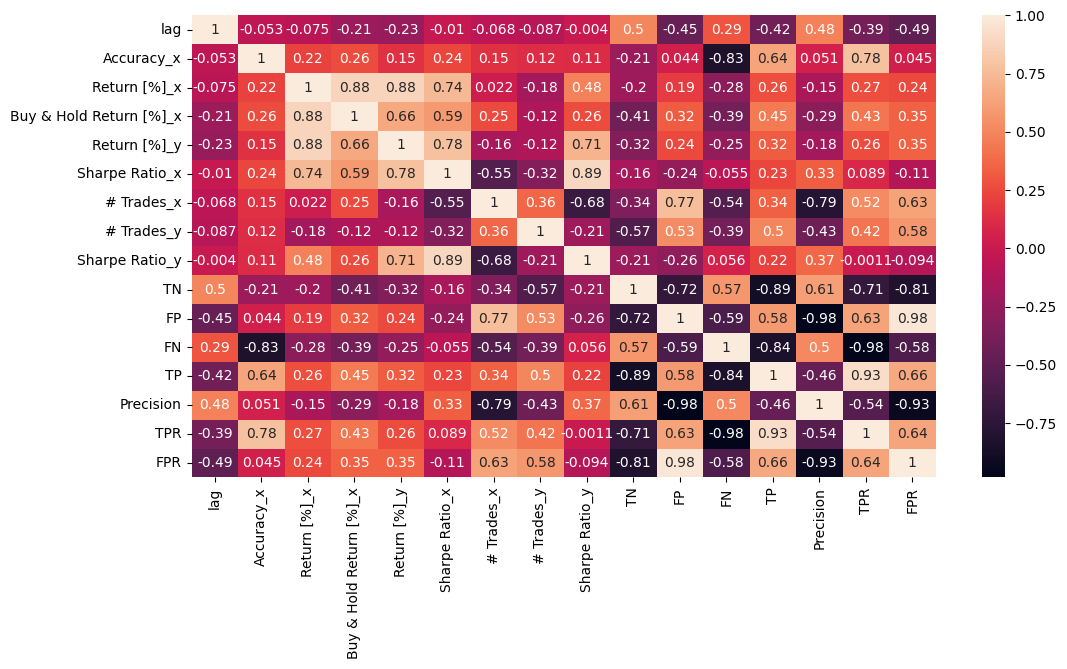

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()].corr(numeric_only = True),annot = True)

<Axes: >

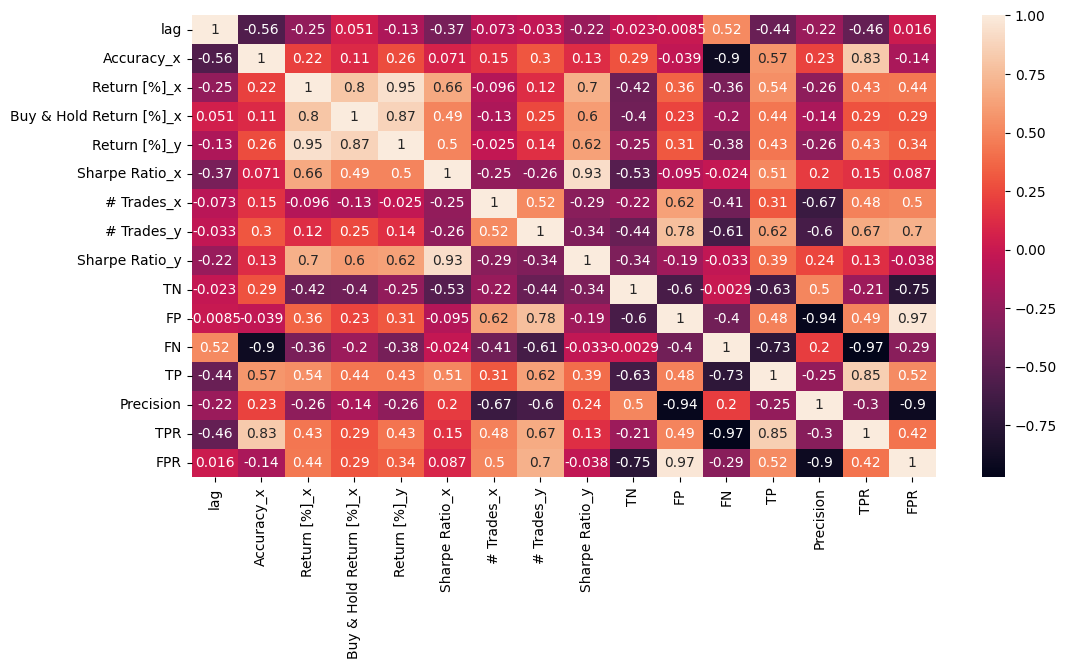

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()].corr(numeric_only = True),annot = True)

In [62]:
merged_df = pd.merge(data.loc[data.groupby('Ticker')['Return [%]_x'].idxmax()],data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()], on = 'Ticker')

In [63]:
merged_df[['Ticker','Model_x','Accuracy_x_x', 'Return [%]_x_x', 'Buy & Hold Return [%]_x_x','Model_y','Accuracy_x_y', 'Return [%]_y_y']]

Ticker              Model_x  Accuracy_x_x  Return [%]_x_x  \
0   AAPL          Naive Bayes      0.883692       52.086655   
1    AMD              XGBoost      0.844501       95.717461   
2   AMZN              XGBoost      0.895070       91.860315   
3  GOOGL        Decision Tree      0.787611       34.953998   
4   META                  SVM      0.821745      354.692579   
5   MSFT        Random Forest      0.677623       42.026809   
6   NFLX        Decision Tree      0.810367      161.144968   
7   NVDA  Logistic Regression      0.878635      574.138232   
8    SPY              XGBoost      0.891277       39.388498   
9   TSLA       SGD Classifier      0.797724      170.442421   

   Buy & Hold Return [%]_x_x              Model_y  Accuracy_x_y  \
0                  30.377457       SGD Classifier      0.845765   
1                 -33.765975                  MLP      0.843236   
2                  22.496772              XGBoost      0.895070   
3                  16.213708        Decision Tree      0.787611   
4                  94.434919                  SVM      0.821745   
5                  17.260642    Gradient Boosting      0.690265   
6                  61.218343          Naive Bayes      0.579014   
7                 298.891140  Logistic Regression      0.878635   
8                  22.469699  K-Nearest Neighbors      0.824273   
9                 -29.499572    Gradient Boosting      0.863464   

   Return [%]_y_y  
0       53.790848  
1       89.041727  
2       85.176460  
3       34.953998  
4      354.055160  
5       38.593637  
6      135.570203  
7      574.138232  
8       41.669320  
9      183.202794

In [64]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()].to_csv('best_models.csv')

In [65]:
data.loc[data.groupby('Ticker')['Accuracy_x'].idxmax()].sum()

Ticker                               AAPLAMDAMZNGOOGLMETAMSFTNFLXNVDASPYTSLA
Model                      XGBoostSGD ClassifierMLPLogistic RegressionSGD...
lag                                                                      285
Accuracy_x                                                          8.974716
Return [%]_x                                                      738.305928
Buy & Hold Return [%]_x                                           500.097133
Return [%]_y                                                      883.839459
Type                       gridgridgridnormalnormalnormalgridnormalrandom...
Sharpe Ratio_x                                                      4.843868
# Trades_x                                                               224
# Trades_y                                                               367
Sharpe Ratio_y                                                      4.884328
TN                                                                      3141

In [66]:
accurate_models = data.loc[data.groupby('Ticker')['Accuracy_x'].idxmax()]

<Axes: xlabel='Ticker', ylabel='Return [%]_y'>

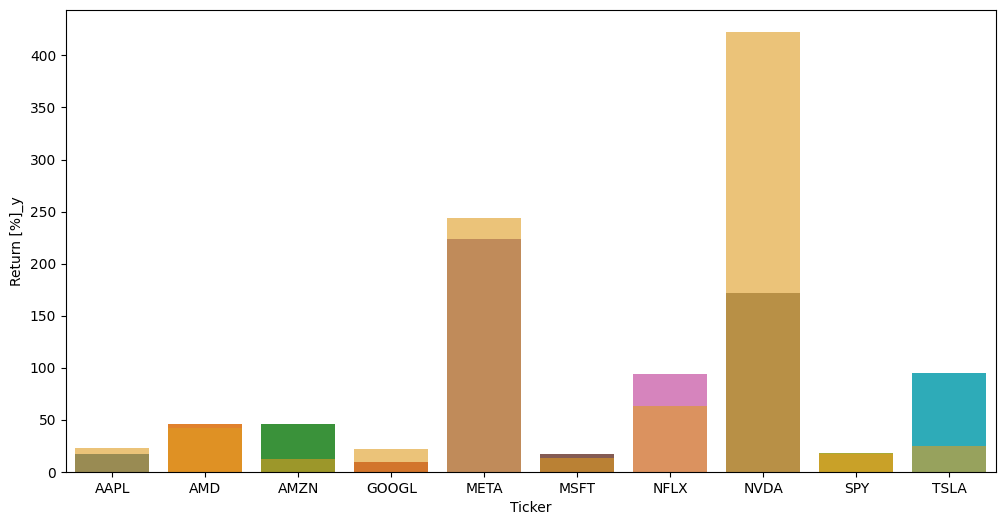

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(data = accurate_models, x = 'Ticker', y = 'Return [%]_x')
# Second bar plot with adjusted position
sns.barplot(data=accurate_models, x='Ticker', y='Return [%]_y', color='orange', label='Return [%]_y', alpha=0.6)

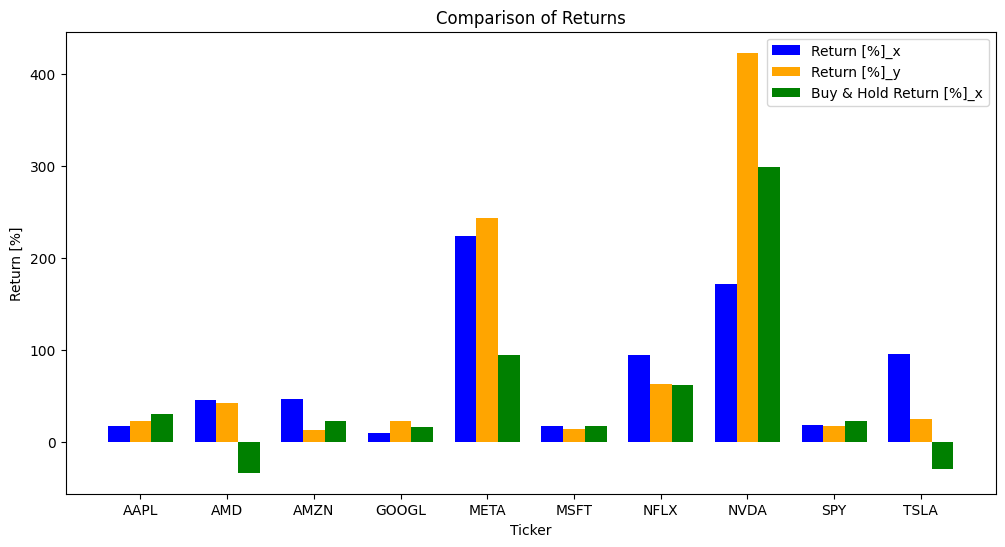

In [68]:
plt.figure(figsize=(12, 6))

# Set position for bars
x = np.arange(len(accurate_models['Ticker']))
width = 0.25  # Adjusted width of the bars

# Create the first set of bars
plt.bar(x - width, accurate_models['Return [%]_x'], width, label='Return [%]_x', color='blue')

# Create the second set of bars
plt.bar(x, accurate_models['Return [%]_y'], width, label='Return [%]_y', color='orange')

# Create the third set of bars
plt.bar(x + width, accurate_models['Buy & Hold Return [%]_x'], width, label='Buy & Hold Return [%]_x', color='green')

# Customize the plot
plt.xlabel('Ticker')
plt.ylabel('Return [%]')
plt.title('Comparison of Returns')
plt.xticks(x, accurate_models['Ticker'])
plt.legend()

plt.show()

<Axes: >

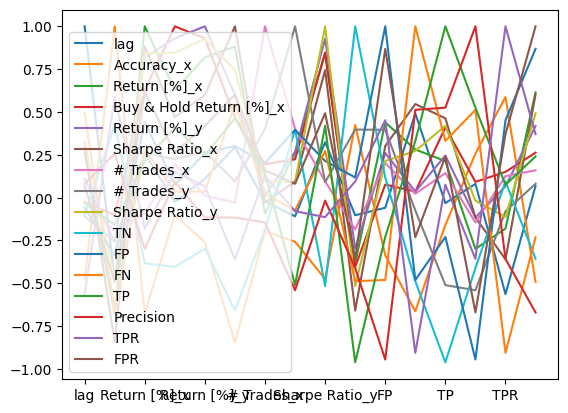

In [69]:
accurate_models.corr(numeric_only  = True).plot()

<Axes: >

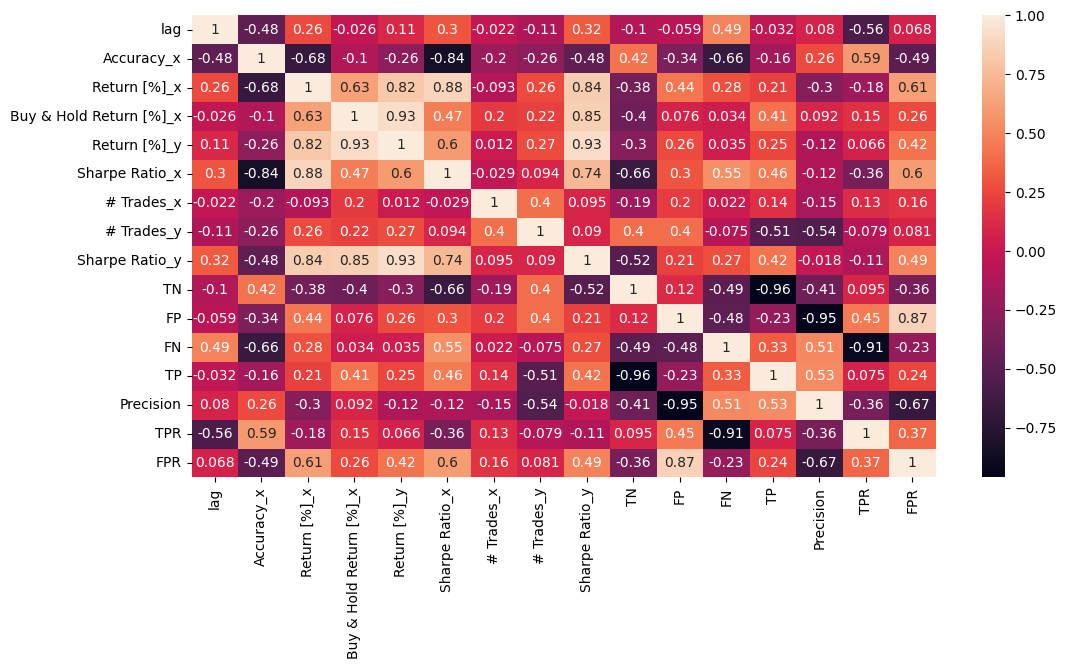

In [70]:
plt.figure(figsize = (12,6))
sns.heatmap(accurate_models.corr(numeric_only  = True),annot = True)

In [71]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()].sum()

Ticker                               AAPLAMDAMZNGOOGLMETAMSFTNFLXNVDASPYTSLA
Model                      SGD ClassifierMLPXGBoostDecision TreeSVMGradie...
lag                                                                      225
Accuracy_x                                                          8.029077
Return [%]_x                                                     1197.270254
Buy & Hold Return [%]_x                                           500.097133
Return [%]_y                                                     1590.192378
Type                       normalgridnormalgridnormalgridrandomgridnormal...
Sharpe Ratio_x                                                       7.32181
# Trades_x                                                               242
# Trades_y                                                               297
Sharpe Ratio_y                                                      8.659154
TN                                                                      3033

In [72]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()].Model.value_counts()

Model
Gradient Boosting      2
SGD Classifier         1
MLP                    1
XGBoost                1
Decision Tree          1
SVM                    1
Naive Bayes            1
Logistic Regression    1
K-Nearest Neighbors    1
Name: count, dtype: int64

In [73]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()].lag.value_counts()

lag
15    4
30    2
25    2
5     1
50    1
Name: count, dtype: int64

In [74]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()].Type.value_counts()

Type
normal    4
grid      4
random    2
Name: count, dtype: int64

In [75]:
log_df = data[data['Model'] == 'Logistic Regression']
log_df.loc[log_df.groupby('Ticker')['Return [%]_y'].idxmax()].sum()

Ticker                               AAPLAMDAMZNGOOGLMETAMSFTNFLXNVDASPYTSLA
Model                      Logistic RegressionLogistic RegressionLogistic...
lag                                                                      275
Accuracy_x                                                          8.654867
Return [%]_x                                                      894.386731
Buy & Hold Return [%]_x                                           500.097133
Return [%]_y                                                     1350.146944
Type                       normalgridrandomnormalnormalnormalrandomgridgr...
Sharpe Ratio_x                                                       4.88287
# Trades_x                                                               235
# Trades_y                                                               308
Sharpe Ratio_y                                                       6.79379
TN                                                                      3067

In [76]:
data.loc[data.groupby('Ticker')['Return [%]_y'].idxmax()]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
2609   AAPL       SGD Classifier   30    0.845765     42.043495   
1973    AMD                  MLP   30    0.843236     49.966701   
288    AMZN              XGBoost   15    0.895070     91.860315   
1346  GOOGL        Decision Tree   25    0.787611     33.977935   
2395   META                  SVM    5    0.821745    354.692579   
1240   MSFT    Gradient Boosting   15    0.690265     33.658183   
2812   NFLX          Naive Bayes   50    0.579014    104.704615   
1391   NVDA  Logistic Regression   25    0.878635    356.144374   
370     SPY  K-Nearest Neighbors   15    0.824273     35.807309   
4672   TSLA    Gradient Boosting   15    0.863464     94.414747   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
2609                30.377457     53.790848  normal        0.759493   
1973               -33.765975     89.041727    grid        0.403204   
288                 22.496772     85.176460  normal        0.794970   
1346                16.213708     34.953998    grid        0.346024   
2395                94.434919    354.055160  normal        1.220025   
1240                17.260642     38.593637    grid        0.658163   
2812                61.218343    135.570203  random        0.760370   
1391               298.891140    574.138232    grid        0.887294   
370                 22.469699     41.669320  normal        0.938145   
4672               -29.499572    183.202794  random        0.554122   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN   FP   FN   TP  Precision  \
2609          17          20        0.950607  366    5  117  303   0.983766   
1973           8          24        0.647533  428   19  105  239   0.926357   
288           26          35        0.778165  280   27   56  428   0.940659   
1346          42          66        0.387196  234  121   47  389   0.762745   
2395          18          27        1.249256  202   77   64  448   0.853333   
1240           9          11        0.736065  371    4  241  175   0.977654   
2812          25          20        0.900786  214   55  278  244   0.816054   
1391          22          42        1.163954  282   60   36  413   0.873150   
370           27          29        1.093108  258   24  115  394   0.942584   
4672          48          23        0.752485  398   56   52  285   0.835777   

           TPR       FPR  
2609  0.721429  0.013477  
1973  0.694767  0.042506  
288   0.884298  0.087948  
1346  0.892202  0.340845  
2395  0.875000  0.275986  
1240  0.420673  0.010667  
2812  0.467433  0.204461  
1391  0.919822  0.175439  
370   0.774067  0.085106  
4672  0.845697  0.123348

In [77]:
log_df = data[data['Model'] == 'Logistic Regression']
log_df.loc[log_df.groupby('Ticker')['Return [%]_y'].idxmax()]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
4940   AAPL  Logistic Regression   60    0.834387     13.046091   
1573    AMD  Logistic Regression    0    0.849558     60.800917   
26     AMZN  Logistic Regression   25    0.882427     27.221262   
299   GOOGL  Logistic Regression   15    0.921618     11.708276   
2522   META  Logistic Regression    0    0.823009    270.685884   
3835   MSFT  Logistic Regression   50    0.911504      0.882310   
1898   NFLX  Logistic Regression   55    0.853350     84.891664   
1391   NVDA  Logistic Regression   25    0.878635    356.144374   
2054    SPY  Logistic Regression   30    0.858407     26.731302   
377    TSLA  Logistic Regression   15    0.841972     42.274653   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
4940                30.377457     22.560790  normal        0.224169   
1573               -33.765975     83.446889    grid        0.473115   
26                  22.496772     31.950606  random        0.344589   
299                 16.213708     33.184979  normal        0.152745   
2522                94.434919    318.204992  normal        1.080810   
3835                17.260642     15.694049  normal        0.015215   
1898                61.218343    112.759326  random        0.707818   
1391               298.891140    574.138232    grid        0.887294   
2054                22.469699     35.399857    grid        0.712957   
377                -29.499572    122.807224  normal        0.284156   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN  FP   FN   TP  Precision  \
4940          28          41        0.380928  290  81   50  370   0.820399   
1573          10          23        0.615952  430  17  102  242   0.934363   
26            32          20        0.373167  285  22   71  413   0.949425   
299           19          26        0.406186  338  17   45  391   0.958333   
2522          17          27        1.196960  202  77   63  449   0.853612   
3835          20          27        0.253966  333  42   28  388   0.902326   
1898          30          16        0.775654  240  29   87  435   0.937500   
1391          22          42        1.163954  282  60   36  413   0.873150   
2054          30          31        0.943175  268  14   98  411   0.967059   
377           27          55        0.683847  399  55   70  267   0.829193   

           TPR       FPR  
4940  0.880952  0.218329  
1573  0.703488  0.038031  
26    0.853306  0.071661  
299   0.896789  0.047887  
2522  0.876953  0.275986  
3835  0.932692  0.112000  
1898  0.833333  0.107807  
1391  0.919822  0.175439  
2054  0.807466  0.049645  
377   0.792285  0.121145

In [78]:
log_df = data[data['Model'] == 'Logistic Regression']
log_df.loc[log_df.groupby('Ticker')['Return [%]_x'].idxmax()].sum()

Ticker                               AAPLAMDAMZNGOOGLMETAMSFTNFLXNVDASPYTSLA
Model                      Logistic RegressionLogistic RegressionLogistic...
lag                                                                      395
Accuracy_x                                                          8.670038
Return [%]_x                                                     1314.356148
Buy & Hold Return [%]_x                                           500.097133
Return [%]_y                                                      868.147967
Type                       normalrandomgridgridnormalgridgridrandomrandom...
Sharpe Ratio_x                                                      6.528669
# Trades_x                                                               243
# Trades_y                                                               300
Sharpe Ratio_y                                                      5.315346
TN                                                                      3101

In [79]:
log_df = data[data['Model'] == 'SVM']
log_df.loc[log_df.groupby('Ticker')['Return [%]_y'].idxmax()].sum()

Ticker                               AAPLAMDAMZNGOOGLMETAMSFTNFLXNVDASPYTSLA
Model                                         SVMSVMSVMSVMSVMSVMSVMSVMSVMSVM
lag                                                                      215
Accuracy_x                                                          8.701643
Return [%]_x                                                      811.852054
Buy & Hold Return [%]_x                                           500.097133
Return [%]_y                                                     1263.230876
Type                       randomgridrandomnormalnormalnormalrandomgridra...
Sharpe Ratio_x                                                      4.444606
# Trades_x                                                               262
# Trades_y                                                               311
Sharpe Ratio_y                                                      6.342496
TN                                                                      3078

In [80]:
log_df = data[data['Model'] == 'SVM']
log_df.loc[log_df.groupby('Ticker')['Return [%]_x'].idxmax()].sum()

Ticker                               AAPLAMDAMZNGOOGLMETAMSFTNFLXNVDASPYTSLA
Model                                         SVMSVMSVMSVMSVMSVMSVMSVMSVMSVM
lag                                                                      215
Accuracy_x                                                          8.657396
Return [%]_x                                                     1263.540315
Buy & Hold Return [%]_x                                           500.097133
Return [%]_y                                                       764.36529
Type                       gridrandomnormalrandomnormalnormalnormalrandom...
Sharpe Ratio_x                                                      6.045973
# Trades_x                                                               282
# Trades_y                                                               319
Sharpe Ratio_y                                                      4.298396
TN                                                                      3093

In [81]:
data.groupby('Model')[['Return [%]_x' , 'Buy & Hold Return [%]_x','Return [%]_y']].sum()

Return [%]_x  Buy & Hold Return [%]_x  Return [%]_y
Model                                                                   
AdaBoost             28472.311100             19503.788182  30525.574622
Decision Tree        22188.949537             19503.788182  22549.694048
Gradient Boosting    27887.825010             19503.788182  29519.658792
K-Nearest Neighbors  21990.617687             19503.788182  21825.987409
LGBMClassifier       28735.968729             19503.788182  29080.731389
Logistic Regression  34191.024404             19503.788182  34101.317172
MLP                  24401.771552             19503.788182  25507.795210
Naive Bayes          23362.673915             19503.788182  23532.017714
Random Forest        30429.205047             19503.788182  31296.153407
SGD Classifier       26745.704147             19503.788182  27652.737878
SVM                  27831.809312             19503.788182  27383.734219
XGBoost              25723.842984             19503.788182  28163.398777

In [82]:
models_average_returns_over_lag = data.groupby(['lag','Model'])[['Return [%]_x' , 'Buy & Hold Return [%]_x','Return [%]_y']].mean()

In [83]:
models_average_returns_over_lag.shape

(156, 3)

In [84]:
models_average_returns_over_lag[models_average_returns_over_lag['Return [%]_x'] > models_average_returns_over_lag['Buy & Hold Return [%]_x']]

Return [%]_x  Buy & Hold Return [%]_x  Return [%]_y
lag Model                                                                   
0   AdaBoost                73.434325                50.009713     79.842710
    Decision Tree           50.965070                50.009713     53.110812
    Gradient Boosting       59.975423                50.009713     69.589375
    K-Nearest Neighbors     70.177297                50.009713     78.454491
    LGBMClassifier          87.114786                50.009713     88.474985
    Logistic Regression     87.540859                50.009713     91.163414
    MLP                     64.748032                50.009713     68.280563
    Naive Bayes             66.715703                50.009713     69.439313
    Random Forest           83.025439                50.009713     86.093583
    SGD Classifier          74.142989                50.009713     78.234227
    SVM                     76.971701                50.009713     80.705899
    XGBoost                 65.150333                50.009713     75.410772
5   AdaBoost                75.219150                50.009713     83.157550
    Decision Tree           55.287884                50.009713     52.491310
    Gradient Boosting       72.571044                50.009713     76.658825
    K-Nearest Neighbors     62.566298                50.009713     63.072233
    LGBMClassifier          88.784984                50.009713     90.245516
    Logistic Regression     84.249091                50.009713     86.817553
    MLP                     63.315699                50.009713     70.886121
    Naive Bayes             59.137331                50.009713     59.448174
    Random Forest           81.180301                50.009713     84.801626
    SGD Classifier          72.573138                50.009713     73.260162
    SVM                     79.263255                50.009713     86.151703
    XGBoost                 68.480949                50.009713     76.730381
10  AdaBoost                76.397390                50.009713     84.652217
    Decision Tree           57.211860                50.009713     58.327834
    Gradient Boosting       73.492867                50.009713     72.223473
    K-Nearest Neighbors     59.053038                50.009713     55.453721
    LGBMClassifier          86.866130                50.009713     85.450859
    Logistic Regression     84.112720                50.009713     87.913423
    MLP                     67.357459                50.009713     72.931125
    Naive Bayes             62.849470                50.009713     62.493539
    Random Forest           79.710428                50.009713     84.049106
    SGD Classifier          72.680239                50.009713     74.870311
    SVM                     73.979543                50.009713     77.648618
    XGBoost                 67.844679                50.009713     71.879594
15  AdaBoost                75.156413                50.009713     82.355005
    Decision Tree           56.309081                50.009713     60.247780
    Gradient Boosting       76.929263                50.009713     83.385992
    K-Nearest Neighbors     56.593657                50.009713     55.928268
    LGBMClassifier          79.946444                50.009713     78.666575
    Logistic Regression     85.863966                50.009713     90.444227
    MLP                     66.575331                50.009713     63.213047
    Naive Bayes             60.672972                50.009713     60.719147
    Random Forest           85.110711                50.009713     90.392655
    SGD Classifier          75.193932                50.009713     82.832442
    SVM                     79.644394                50.009713     74.866694
    XGBoost                 72.887695                50.009713     76.719237
20  AdaBoost                75.324166                50.009713     80.403979
    Decision Tree           61.218330                50.009713     57.798569
    Gradient Boosting

In [85]:
data.groupby(['Type'])[['Return [%]_x' , 'Buy & Hold Return [%]_x','Return [%]_y']].mean().sum()

Return [%]_x               206.385707
Buy & Hold Return [%]_x    150.029140
Return [%]_y               212.268462
dtype: float64

In [86]:
data.groupby(['lag'])[['Return [%]_x' , 'Buy & Hold Return [%]_x','Return [%]_y']].mean().sum()

Return [%]_x               894.338065
Buy & Hold Return [%]_x    650.126273
Return [%]_y               919.830002
dtype: float64

In [87]:
data.loc[data.groupby(['Type'])['Return [%]_x'].idxmax()].sum()

Ticker                                                          NVDANVDANVDA
Model                      Logistic RegressionSGD ClassifierLogistic Regr...
lag                                                                      100
Accuracy_x                                                          2.515803
Return [%]_x                                                     1376.198887
Buy & Hold Return [%]_x                                           896.673421
Return [%]_y                                                     1122.756086
Type                                                        gridnormalrandom
Sharpe Ratio_x                                                       2.91107
# Trades_x                                                                81
# Trades_y                                                               135
Sharpe Ratio_y                                                      2.796535
TN                                                                       737

In [88]:
data.loc[data.groupby(['Model'])['Return [%]_y'].idxmax()]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
1269   NVDA             AdaBoost   15    0.900126    218.499033   
4908   NVDA        Decision Tree   40    0.807838    159.998402   
876    NVDA    Gradient Boosting   55    0.887484    200.119352   
2567   NVDA  K-Nearest Neighbors    0    0.852086    178.252215   
1142   NVDA       LGBMClassifier   20    0.893805    252.525757   
1391   NVDA  Logistic Regression   25    0.878635    356.144374   
3221   NVDA                  MLP   20    0.859671    232.195825   
875    NVDA          Naive Bayes   55    0.863464    249.107256   
1262   NVDA        Random Forest   15    0.903919    259.226574   
360    NVDA       SGD Classifier   15    0.874842    201.737856   
1264   NVDA                  SVM   15    0.878635    248.510597   
4513   NVDA              XGBoost   35    0.860936    289.492101   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
1269                298.89114    465.798792    grid        0.712973   
4908                298.89114    313.003889    grid        0.587568   
876                 298.89114    484.805819    grid        0.684173   
2567                298.89114    444.444045  normal        0.640873   
1142                298.89114    456.690359  normal        0.760042   
1391                298.89114    574.138232    grid        0.887294   
3221                298.89114    563.328519    grid        0.733842   
875                 298.89114    399.603475    grid        0.760592   
1262                298.89114    520.931032    grid        0.788240   
360                 298.89114    487.873678  normal        0.672631   
1264                298.89114    524.638912    grid        0.747521   
4513                298.89114    458.276502    grid        0.787569   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN  FP  FN   TP  Precision  \
1269          23          43        1.113851  293  49  30  419   0.895299   
4908          37          70        0.985505  248  94  58  391   0.806186   
876           26          53        1.159217  285  57  32  417   0.879747   
2567          19          36        1.090348  293  49  68  381   0.886047   
1142          26          51        1.113724  284  58  26  423   0.879418   
1391          22          42        1.163954  282  60  36  413   0.873150   
3221          25          50        1.199153  279  63  48  401   0.864224   
875           28          49        1.042375  285  57  51  398   0.874725   
1262          25          48        1.173786  295  47  29  420   0.899358   
360           20          42        1.136751  287  55  44  405   0.880435   
1264          17          40        1.165067  286  56  40  409   0.879570   
4513          25          55        1.060395  258  84  26  423   0.834320   

           TPR       FPR  
1269  0.933185  0.143275  
4908  0.870824  0.274854  
876   0.928731  0.166667  
2567  0.848552  0.143275  
1142  0.942094  0.169591  
1391  0.919822  0.175439  
3221  0.893096  0.184211  
875   0.886414  0.166667  
1262  0.935412  0.137427  
360   0.902004  0.160819  
1264  0.910913  0.163743  
4513  0.942094  0.245614

In [89]:
data.loc[data.groupby(['lag'])['Return [%]_x'].idxmax()].sum()

Ticker                     NVDANVDANVDANVDANVDANVDANVDANVDANVDANVDANVDANV...
Model                      Logistic RegressionLogistic RegressionLogistic...
lag                                                                      390
Accuracy_x                                                         11.367889
Return [%]_x                                                       7290.4682
Buy & Hold Return [%]_x                                          3885.584824
Return [%]_y                                                     3538.521746
Type                       randomrandomrandomrandomrandomrandomrandomrand...
Sharpe Ratio_x                                                     15.047434
# Trades_x                                                               554
# Trades_y                                                               281
Sharpe Ratio_y                                                     10.531786
TN                                                                      3627

In [90]:
data.loc[data.groupby(['Type'])['Return [%]_y'].idxmax()]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
1391   NVDA  Logistic Regression   25    0.878635    356.144374   
1782   NVDA        Random Forest   10    0.901391    290.012128   
2265   META                  SVM    5    0.821745    354.055160   

      Buy & Hold Return [%]_x  Return [%]_y    Type  Sharpe Ratio_x  \
1391               298.891140    574.138232    grid        0.887294   
1782               298.891140    505.926564  normal        0.832639   
2265                94.434919    350.909789  random        1.249256   

      # Trades_x  # Trades_y  Sharpe Ratio_y   TN  FP  FN   TP  Precision  \
1391          22          42        1.163954  282  60  36  413   0.873150   
1782          23          42        1.157881  297  45  33  416   0.902386   
2265          27          18        1.221680  202  77  64  448   0.853333   

           TPR       FPR  
1391  0.919822  0.175439  
1782  0.926503  0.131579  
2265  0.875000  0.275986

In [91]:
best = data.loc[data.groupby(['Ticker'])['Return [%]_y'].idxmax()]

In [92]:
data[data['Return [%]_x'] > data['Buy & Hold Return [%]_x']]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
13      AMD  Logistic Regression   25    0.854614     82.923056   
14      AMD        Random Forest   25    0.780025     55.002753   
15      AMD              XGBoost   25    0.844501     95.717461   
16      AMD                  SVM   25    0.840708     27.939207   
17      AMD          Naive Bayes   25    0.840708     11.190420   
18      AMD    Gradient Boosting   25    0.807838     80.688335   
19      AMD  K-Nearest Neighbors   25    0.769912    -22.646195   
20      AMD        Decision Tree   25    0.836915      3.573423   
21      AMD             AdaBoost   25    0.858407     43.971625   
22      AMD       SGD Classifier   25    0.850822     47.561985   
23      AMD                  MLP   25    0.845765     77.744581   
24      AMD       LGBMClassifier   25    0.829330     52.336599   
26     AMZN  Logistic Regression   25    0.882427     27.221262   
27     AMZN        Random Forest   25    0.878635     58.612076   
28     AMZN              XGBoost   25    0.890013     44.578175   
31     AMZN    Gradient Boosting   25    0.886220     56.910896   
33     AMZN        Decision Tree   25    0.858407     22.545937   
34     AMZN             AdaBoost   25    0.874842     33.800154   
37     AMZN       LGBMClassifier   25    0.882427     31.121459   
39    GOOGL  Logistic Regression   25    0.901391     20.402515   
46    GOOGL        Decision Tree   25    0.787611     34.953998   
48    GOOGL       SGD Classifier   25    0.911504     30.827045   
49    GOOGL                  MLP   25    0.888748     24.531194   
52     META  Logistic Regression   25    0.848293    230.794748   
53     META        Random Forest   25    0.858407    249.170479   
54     META              XGBoost   25    0.826802    266.500155   
55     META                  SVM   25    0.836915    230.092730   
56     META          Naive Bayes   25    0.815424    205.199446   
57     META    Gradient Boosting   25    0.830594    174.461263   
58     META  K-Nearest Neighbors   25    0.814159    214.075733   
59     META        Decision Tree   25    0.817952    203.199935   
60     META             AdaBoost   25    0.858407    226.142145   
61     META       SGD Classifier   25    0.752212    197.315686   
62     META                  MLP   25    0.855879    228.039706   
63     META       LGBMClassifier   25    0.847029    195.833081   
66     MSFT        Random Forest   25    0.668774     30.541475   
70     MSFT    Gradient Boosting   25    0.666245     26.347869   
71     MSFT  K-Nearest Neighbors   25    0.720607     20.226922   
78     NFLX  Logistic Regression   25    0.854614     83.973965   
79     NFLX        Random Forest   25    0.847029     64.869157   
91     NVDA  Logistic Regression   25    0.878635    574.138232   
92     NVDA        Random Forest   25    0.883692    485.731669   
93     NVDA              XGBoost   25    0.860936    315.534959   
94     NVDA                  SVM   25    0.873578    483.739799   
95     NVDA          Naive Bayes   25    0.855879    346.403403   
96     NVDA    Gradient Boosting   25    0.867257    346.991355   
99     NVDA             AdaBoost   25    0.900126    465.798792   
101    NVDA                  MLP   25    0.871049    386.167627   
102    NVDA       LGBMClassifier   25    0.896334    358.132402   
105     SPY        Random Forest   25    0.830594     36.040783   
110     SPY  K-Nearest Neighbors   25    0.791403     30.168358   
112     SPY             AdaBoost   25    0.867257     23.146376   
114     SPY                  MLP   25    0.835651     28.937856   
117    TSLA  Logistic Regression   25    0.850822     62.731682   
118    TSLA        Random Forest   25    0.858407     67.938883   
119    TSLA              XGBoost   25    0.872314     50.972858   
120    TSLA                  SVM   25    0.865992     21.835289   
121    TSLA          Naive Bayes   25    0.652339     61.346568   
122    TSLA    Gradient Boosting   25    0.878635   

In [93]:
data[data['Return [%]_y'] > data['Buy & Hold Return [%]_x']]

Ticker                Model  lag  Accuracy_x  Return [%]_x  \
13      AMD  Logistic Regression   25    0.854614     82.923056   
14      AMD        Random Forest   25    0.780025     55.002753   
15      AMD              XGBoost   25    0.844501     95.717461   
16      AMD                  SVM   25    0.840708     27.939207   
17      AMD          Naive Bayes   25    0.840708     11.190420   
18      AMD    Gradient Boosting   25    0.807838     80.688335   
19      AMD  K-Nearest Neighbors   25    0.769912    -22.646195   
20      AMD        Decision Tree   25    0.836915      3.573423   
21      AMD             AdaBoost   25    0.858407     43.971625   
22      AMD       SGD Classifier   25    0.850822     47.561985   
23      AMD                  MLP   25    0.845765     77.744581   
24      AMD       LGBMClassifier   25    0.829330     52.336599   
26     AMZN  Logistic Regression   25    0.882427     27.221262   
27     AMZN        Random Forest   25    0.878635     58.612076   
28     AMZN              XGBoost   25    0.890013     44.578175   
29     AMZN                  SVM   25    0.888748     10.439115   
30     AMZN          Naive Bayes   25    0.601770      8.114109   
31     AMZN    Gradient Boosting   25    0.886220     56.910896   
32     AMZN  K-Nearest Neighbors   25    0.873578     20.461819   
33     AMZN        Decision Tree   25    0.858407     22.545937   
34     AMZN             AdaBoost   25    0.874842     33.800154   
37     AMZN       LGBMClassifier   25    0.882427     31.121459   
46    GOOGL        Decision Tree   25    0.787611     34.953998   
52     META  Logistic Regression   25    0.848293    230.794748   
53     META        Random Forest   25    0.858407    249.170479   
54     META              XGBoost   25    0.826802    266.500155   
55     META                  SVM   25    0.836915    230.092730   
56     META          Naive Bayes   25    0.815424    205.199446   
57     META    Gradient Boosting   25    0.830594    174.461263   
58     META  K-Nearest Neighbors   25    0.814159    214.075733   
59     META        Decision Tree   25    0.817952    203.199935   
60     META             AdaBoost   25    0.858407    226.142145   
61     META       SGD Classifier   25    0.752212    197.315686   
62     META                  MLP   25    0.855879    228.039706   
63     META       LGBMClassifier   25    0.847029    195.833081   
66     MSFT        Random Forest   25    0.668774     30.541475   
67     MSFT              XGBoost   25    0.865992     15.903066   
70     MSFT    Gradient Boosting   25    0.666245     26.347869   
73     MSFT             AdaBoost   25    0.900126     14.899068   
78     NFLX  Logistic Regression   25    0.854614     83.973965   
79     NFLX        Random Forest   25    0.847029     64.869157   
81     NFLX                  SVM   25    0.840708     35.166335   
83     NFLX    Gradient Boosting   25    0.841972     55.940841   
86     NFLX             AdaBoost   25    0.838180     57.971552   
87     NFLX       SGD Classifier   25    0.848293     44.446660   
88     NFLX                  MLP   25    0.839444     57.520028   
105     SPY        Random Forest   25    0.830594     36.040783   
110     SPY  K-Nearest Neighbors   25    0.791403     30.168358   
114     SPY                  MLP   25    0.835651     28.937856   
117    TSLA  Logistic Regression   25    0.850822     62.731682   
118    TSLA        Random Forest   25    0.858407     67.938883   
119    TSLA              XGBoost   25    0.872314     50.972858   
120    TSLA                  SVM   25    0.865992     21.835289   
121    TSLA          Naive Bayes   25    0.652339     61.346568   
122    TSLA    Gradient Boosting   25    0.878635    115.334605   
123    TSLA  K-Nearest Neighbors   25    0.763590     11.680619   
124    TSLA        Decision Tree   25    0.858407     60.392810   
125    TSLA             AdaBoost   25    0.858407    102.378537   
126    TSLA       SGD Classifier   25    0.820480   

<Axes: ylabel='Return [%]_x'>

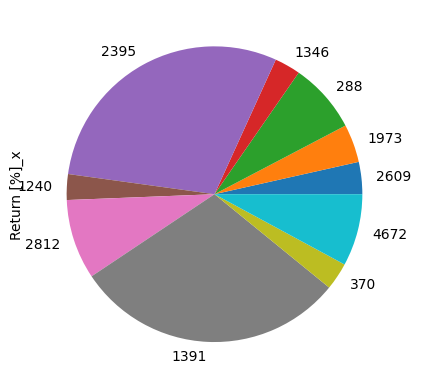

In [94]:
best['Return [%]_x'].plot(kind = 'pie',)